In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
excel_file = pd.ExcelFile('P1-SuperStoreUS-2015.xlsx')
data = pd.read_excel(excel_file, 'Orders')
data1 = pd.read_excel(excel_file, 'Returns')
data2 = pd.read_excel(excel_file, 'Users')

In [3]:
print(f"Total samples: {len(data)}")

Total samples: 1952


In [17]:
data.head(-1)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,20624,Low,0.00,1270.99,19.99,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Danville,61832,2015-06-07,2015-06-09,6384.4389,7,9252.81,87535
1947,19842,High,0.01,10.90,7.46,3397,Andrea Shaw,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-116.7600,18,207.31,87536
1948,19843,High,0.10,7.99,5.03,3397,Andrea Shaw,Regular Air,Small Business,Technology,...,Central,Illinois,Danville,61832,2015-03-11,2015-03-12,-160.9520,22,143.12,87536
1949,26208,Not Specified,0.08,11.97,5.81,3399,Marvin Reid,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Des Plaines,60016,2015-03-29,2015-03-31,-41.8700,5,59.98,87534


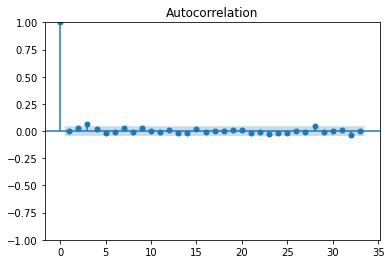

In [5]:
column_name = 'Sales'

# Plot the autocorrelation function
plot_acf(data[column_name])
plt.show()

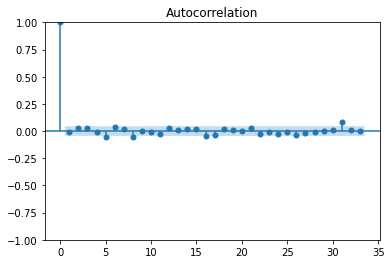

In [31]:
column_name = 'Profit'

# Plot the autocorrelation function
plot_acf(data[column_name])
plt.show()

In [6]:
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Display the lists
print("Numerical Columns:", numerical_columns)
print("\nCategorical Columns:", categorical_columns)

Numerical Columns: ['Row ID', 'Discount', 'Unit Price', 'Shipping Cost', 'Customer ID', 'Product Base Margin', 'Postal Code', 'Profit', 'Quantity ordered new', 'Sales', 'Order ID']

Categorical Columns: ['Order Priority', 'Customer Name', 'Ship Mode', 'Customer Segment', 'Product Category', 'Product Sub-Category', 'Product Container', 'Product Name', 'Country', 'Region', 'State or Province', 'City']


In [7]:
#Filter the Data
start_date = '2015-01-01'
end_date = '2015-06-30'
filtered_data = data[(data['Order Date'] >= start_date) & (data['Order Date'] <= end_date)]


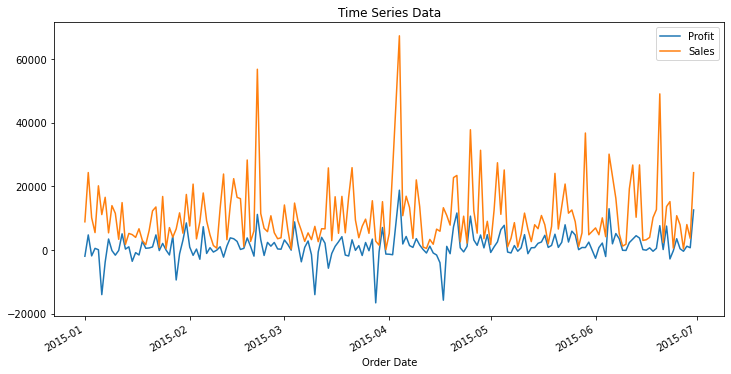

In [8]:
# Extract Time Series
time_series_data = filtered_data[['Order Date', 'Profit', 'Sales']].groupby('Order Date').sum()

# Plot the Time Series
time_series_data['Profit'].plot(figsize=(12, 6), label='Profit')
time_series_data['Sales'].plot(label='Sales')
plt.legend()
plt.title('Time Series Data')
plt.show()

In [9]:
#Check for Stationarity
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
# Perform stationarity test
test_stationarity(time_series_data['Profit'])

ADF Statistic: -12.265111936967587
p-value: 8.896750161803072e-23
Critical Values: {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}


The ADF statistic is much more negative than the critical values at all significance levels, and the p-value is extremely small. Therefore, reject the null hypothesis of having a unit root.
The interpretation is that the time series data is likely stationary, meaning it does not have a unit root and exhibits some level of stability over time.
Therefore time series data is stationary

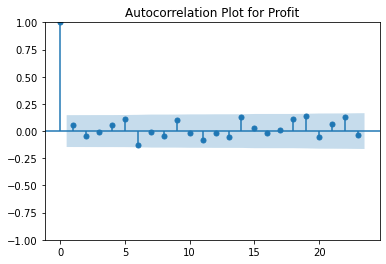

/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


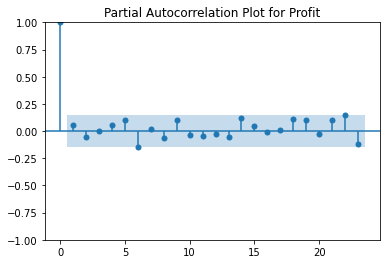

In [10]:

plot_acf(time_series_data['Profit'])
plt.title('Autocorrelation Plot for Profit')
plt.show()

plot_pacf(time_series_data['Profit'])
plt.title('Partial Autocorrelation Plot for Profit')
plt.show()

In [11]:
# Fit ARIMA Model

p, d, q = 2, 1, 1
model_profit = ARIMA(time_series_data['Profit'], order=(p, d, q))
fit_model_profit = model_profit.fit()

/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
#Make Predictions for July 2015
forecast_steps = 9 
forecast_profit = fit_model_profit.get_forecast(steps=forecast_steps)

# Print the forecasted values for Profit
print("Forecasted Profit for July 2015:")
print(forecast_profit.predicted_mean)

Forecasted Profit for July 2015:
179    2649.401182
180    1364.739080
181    2072.904532
182    2198.079576
183    2148.797192
184    2137.354666
185    2140.679831
186    2141.680688
187    2141.465085
Name: predicted_mean, dtype: float64


/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [13]:
#Filter the Data for a Specific Product Category
category_to_forecast = 'Office Supplies'  
filtered_data = data[(data['Order Date'] >= start_date) & (data['Order Date'] <= end_date) & (data['Product Category'] == category_to_forecast)]


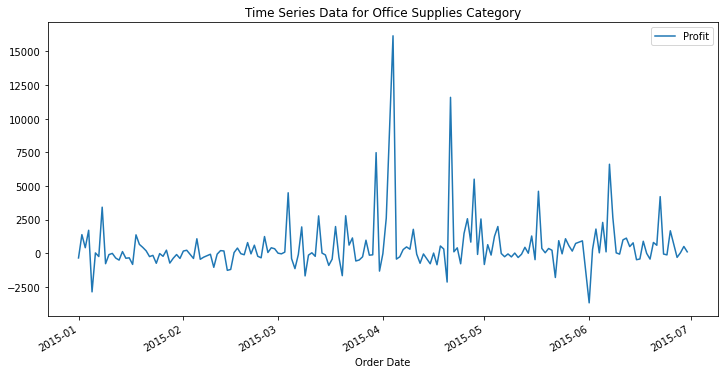

In [14]:
time_series_data = filtered_data[['Order Date', 'Profit']].groupby('Order Date').sum()

time_series_data['Profit'].plot(figsize=(12, 6), label='Profit')
plt.legend()
plt.title(f'Time Series Data for {category_to_forecast} Category')
plt.show()

ADF Statistic: -13.771573206007597
p-value: 9.660447758003244e-26
Critical Values: {'1%': -3.4685016947910636, '5%': -2.8782983668563396, '10%': -2.57570415906989}


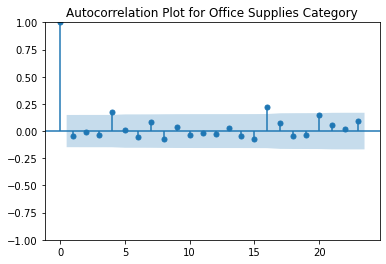

/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


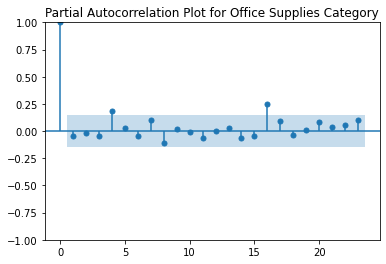

In [15]:
test_stationarity(time_series_data['Profit'])


plot_acf(time_series_data['Profit'])
plt.title(f'Autocorrelation Plot for {category_to_forecast} Category')
plt.show()

plot_pacf(time_series_data['Profit'])
plt.title(f'Partial Autocorrelation Plot for {category_to_forecast} Category')
plt.show()


In [16]:
p, d, q = 2, 1, 1
model_profit = ARIMA(time_series_data['Profit'], order=(p, d, q))
fit_model_profit = model_profit.fit()

forecast_steps = 8  
forecast_profit = fit_model_profit.get_forecast(steps=forecast_steps)

# Print the forecasted values for Profit
print(f"Forecasted Profit for {category_to_forecast} Category in July 2015:")
print(forecast_profit.predicted_mean)

/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros a

Forecasted Profit for Office Supplies Category in July 2015:
175    722.014493
176    690.795340
177    669.183002
178    672.076470
179    672.704781
180    672.542459
181    672.530214
182    672.537549
Name: predicted_mean, dtype: float64


/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [18]:
#Filter the Data for a Specific Product Category
category_to_forecast = 'Furniture'  
filtered_data = data[(data['Order Date'] >= start_date) & (data['Order Date'] <= end_date) & (data['Product Category'] == category_to_forecast)]


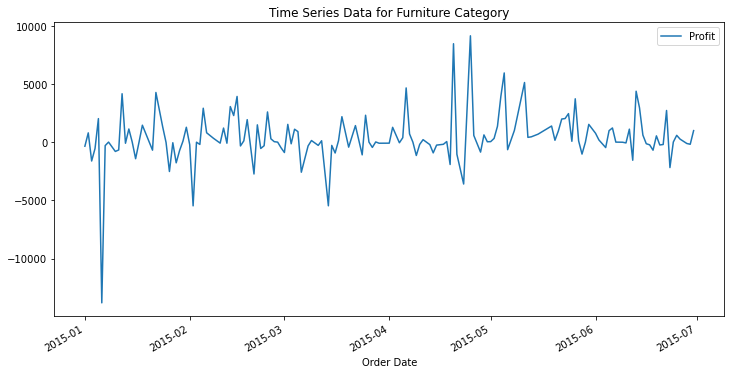

In [19]:
time_series_data = filtered_data[['Order Date', 'Profit']].groupby('Order Date').sum()

time_series_data['Profit'].plot(figsize=(12, 6), label='Profit')
plt.legend()
plt.title(f'Time Series Data for {category_to_forecast} Category')
plt.show()

ADF Statistic: -5.886703479479422
p-value: 2.98986312528019e-07
Critical Values: {'1%': -3.4756368462466662, '5%': -2.8814104466172608, '10%': -2.5773652982553568}


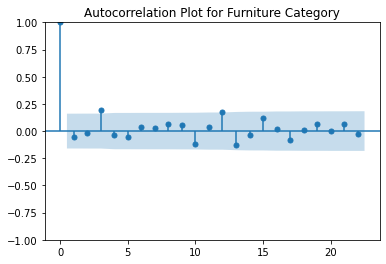

/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


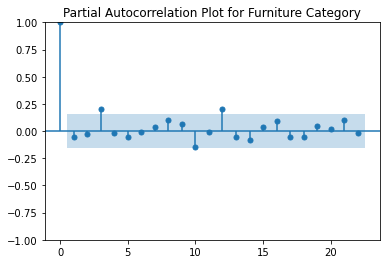

In [20]:
test_stationarity(time_series_data['Profit'])


plot_acf(time_series_data['Profit'])
plt.title(f'Autocorrelation Plot for {category_to_forecast} Category')
plt.show()

plot_pacf(time_series_data['Profit'])
plt.title(f'Partial Autocorrelation Plot for {category_to_forecast} Category')
plt.show()


In [21]:
p, d, q = 2, 1, 1
model_profit = ARIMA(time_series_data['Profit'], order=(p, d, q))
fit_model_profit = model_profit.fit()

forecast_steps = 8  
forecast_profit = fit_model_profit.get_forecast(steps=forecast_steps)

# Print the forecasted values for Profit
print(f"Forecasted Profit for {category_to_forecast} Category in July 2015:")
print(forecast_profit.predicted_mean)

/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Forecasted Profit for Furniture Category in July 2015:
150    481.701769
151    452.638421
152    495.218458
153    492.573813
154    489.668507
155    490.197331
156    490.356026
157    490.298205
Name: predicted_mean, dtype: float64


/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [22]:
#Filter the Data for a Specific Product Category
category_to_forecast = 'Technology'  
filtered_data = data[(data['Order Date'] >= start_date) & (data['Order Date'] <= end_date) & (data['Product Category'] == category_to_forecast)]


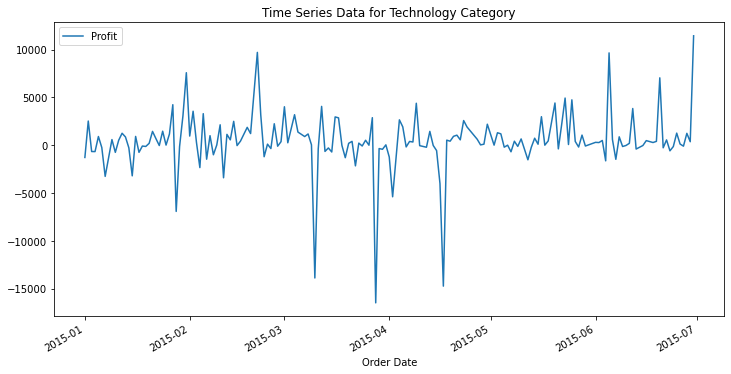

In [29]:
time_series_data = filtered_data[['Order Date', 'Profit']].groupby('Order Date').sum()
time_series_data['Profit'].plot(figsize=(12, 6), label='Profit')
plt.legend()
plt.title(f'Time Series Data for {category_to_forecast} Category')
plt.show()




ADF Statistic: -11.972523779108565
p-value: 3.868542463644342e-22
Critical Values: {'1%': -3.47086589632514, '5%': -2.879330279087651, '10%': -2.57625492712671}


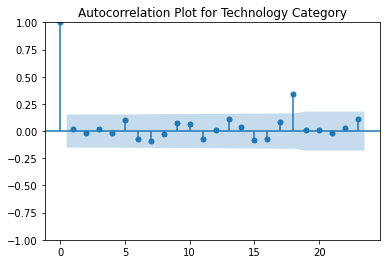

/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


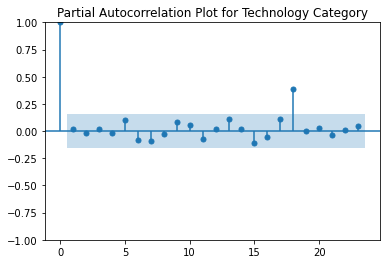

In [26]:
test_stationarity(time_series_data['Profit'])


plot_acf(time_series_data['Profit'])
plt.title(f'Autocorrelation Plot for {category_to_forecast} Category')
plt.show()

plot_pacf(time_series_data['Profit'])
plt.title(f'Partial Autocorrelation Plot for {category_to_forecast} Category')
plt.show()


In [30]:
p, d, q = 2, 1, 1
model_profit = ARIMA(time_series_data['Profit'], order=(p, d, q))
fit_model_profit = model_profit.fit()

forecast_steps = 8  
forecast_profit = fit_model_profit.get_forecast(steps=forecast_steps)

# Print the forecasted values for Profit
print(f"Forecasted Profit for {category_to_forecast} Category in July 2015:")
print(forecast_profit.predicted_mean)

/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Forecasted Profit for Technology Category in July 2015:
165    1175.023496
166     724.369048
167    1088.757824
168    1106.794958
169    1093.886220
170    1093.173277
171    1093.630182
172    1093.658076
Name: predicted_mean, dtype: float64


/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
